# CHART DASHBOARDS

### Logs dashboards

In [55]:
%run 'db/models/training_session.py'
%run 'db/models/training_log.py'

from db.models import training_session, training_log
import matplotlib.pyplot as plt 

Setting up sqlite  sqlite:////home/work/ai_lotto/notebooks/db/ai_lotto.db
Setting up sqlite  sqlite:////home/work/ai_lotto/notebooks/db/ai_lotto.db


/usr/local/lib/python3.6/dist-packages/sqlalchemy/ext/declarative/clsregistry.py:129: SAWarning: This declarative base already contains a class with the same class name and module name as __main__.TrainingSession, and will be replaced in the string-lookup table.
  % (item.__module__, item.__name__)
/usr/local/lib/python3.6/dist-packages/sqlalchemy/ext/declarative/clsregistry.py:129: SAWarning: This declarative base already contains a class with the same class name and module name as __main__.TrainingLog, and will be replaced in the string-lookup table.
  % (item.__module__, item.__name__)


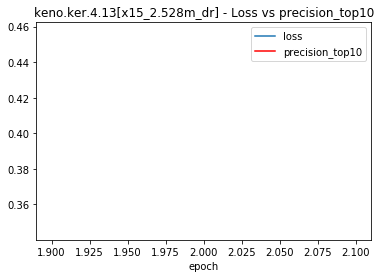

In [106]:
#modset_id = "hotspot.ker.4.13[x15_25k_dr]";
modset_id = "keno.ker.4.13[x15_2.528m_dr]"

trainingLog = training_log.TrainingLog(modset_id);
df_logs = trainingLog.get_dataframe();
df_logs.set_index('train_log_id', inplace=True)
logs = df_logs.loc[df_logs.modset_id == modset_id ]

logs.plot(kind='line',x='epoch',y='loss',ax=plt.gca())
logs.plot(kind='line',x='epoch',y='metric_value', legend='precision_top10', color='red', ax=plt.gca())

plt.title('{0} - Loss vs {1}'.format(modset_id, logs['metric_name'].unique()[0]))
plt.legend(['loss',logs['metric_name'].unique()[0]])
plt.show()


modset_id
hotspot.ker.4.13[x15_25k_dr]    1200
keno.ker.4.13[x15_2.528m_dr]      10
Name: epochs_total, dtype: int64


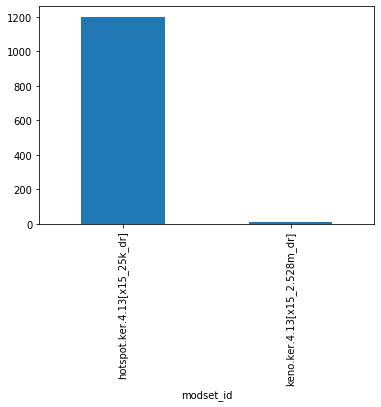

In [104]:
# List of sessions
sessions = training_session.TrainingSession(modset_id)
df_sessions = sessions.get_dataframe()
print(df_sessions.groupby('modset_id')['epochs_total'].sum())
df_sessions.groupby('modset_id')['epochs_total'].sum().plot(kind='bar')

,train_sess_id,modset_id,datetime,epoch,loss,metric_name,metric_value
train_log_id,,,,,,,
1,20200526231640,keno.ker.4.13[x15_2.528m_dr],2020-05-26 23:16:49.094720,2,0.45678,precision_top10,0.345667


### Reference

https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot#plot-two-columns-as-scatter-plot
http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/